# # Generate Figure 1
Single neuron and network responses following stimulation. A. Top: Schematic representation of the network model. Excitatory (E) connectivity profile was based on experimental data. The excitatory population was reciprocally connected with the Inhibitory (I) in a feedback way. Bottom: Random network connectivity changes only excitatory connectivity. B. Top: Cartoon morphology of the pyramidal model. Bottom: Same for fast-spiking interneuron. C. Top: three exemplar responses of pyramidals in a single trial. Bottom: Same for interneurons. D. Top: Network response activity raster plot of pyramidal (blue) and interneurons (red) to a 1 sec stimulus. Bottom: Same trial’s instantaneous firing frequencies of each pyramidal (> 20Hz), showing its highly dynamic response during delay period. E. Histograms of inter spike interval length (top) and Coefficient of Variation (bottom) of all the structured trials for the stimulus period (blue) and delay period (red). F. Top: Non-linear NMDA responses are generated in the basal dendrites of the pyramidal neurons (top) as in (Nevian et al. 2007b) (bottom). Somatic (blue) and dendritic (red) depolarization from resting potential in response to increasing stimulus intensity. G. Overall network response energy (mean firing rate; top) and multidimensional velocity (bottom) aligned on stimulus period onset. H. Top: Cross correlation of network states between the stimulus period and the delay period over time (aligned on stimulus onset, 1 s stimulus). Bottom: Experimentally reported correlation from (Murray et al. 2017). I.  Network responses for 10 trials, under one learning condition, reduced to their first three principal components. Colormap denotes time.

Import necessary modules:

In [1]:
import notebook_module as nb
import analysis_tools as analysis
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from functools import partial
from pathlib import Path
from pynwb import NWBHDF5IO
from itertools import chain
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create figure 1.

C:\Users\steve\Documents\analysis\Python\analysis_tools.py:874: RuntimeWarning: Mean of empty slice.
  mu = ISIs.mean()
C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\steve\Documents\analysis\Python\analysis_tools.py:917: RuntimeWarning: Mean of empty slice.
  mu = ISIs.mean()
C:\Users\steve\AppDa

pcaL2 reseeds the RNG.
L found to be: 4


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\steve\anaconda3\envs\publication\lib\site-packages\ipykernel_launcher.py:313: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(52.4, 22.5)


c:\users\steve\anaconda3\envs\publication\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


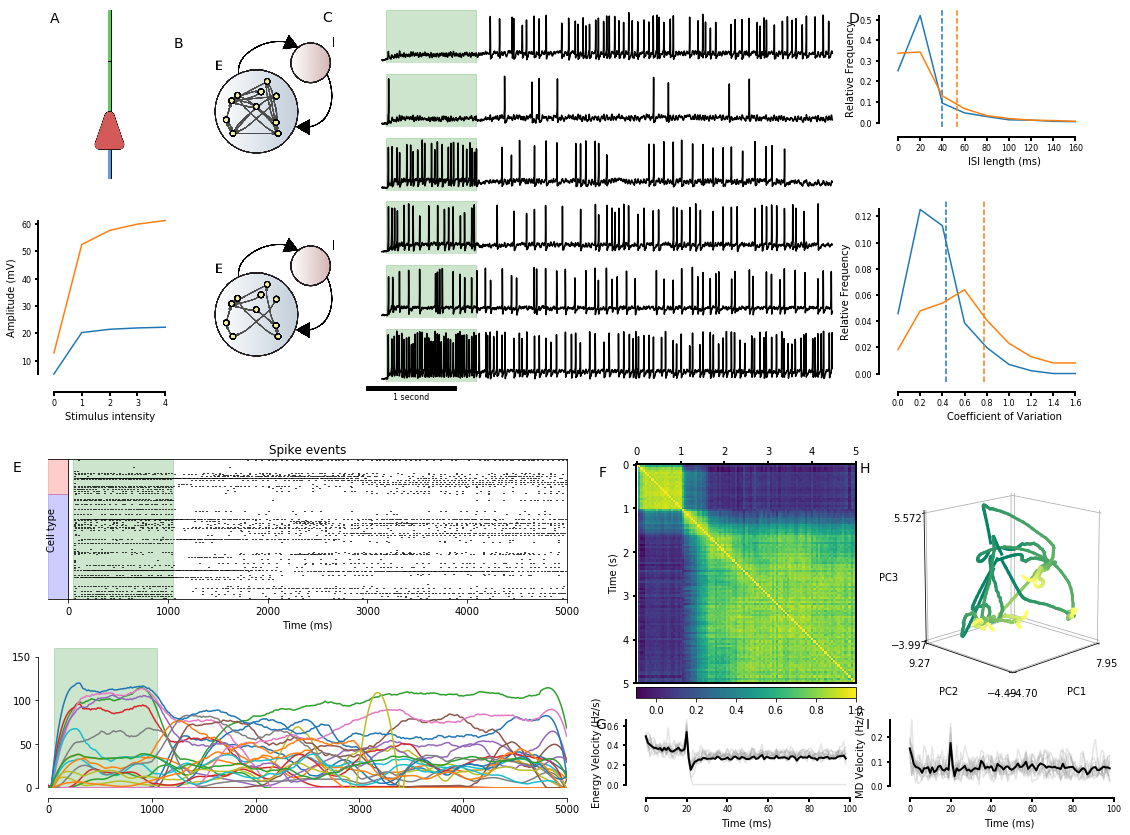

In [2]:
simulations_dir = Path.cwd().joinpath('simulations')
glia_dir = Path(r'G:\Glia')
plt.rcParams.update({'font.family': 'Helvetica'})
plt.rcParams["figure.figsize"] = (15, 15)

y_array = np.linspace(0.1, 100, 1000)
y_i = 500
plt.ion()
axis_label_font_size = 10
no_of_conditions = 3#10
no_of_animals = 2#4
#===============================================================================
#===============================================================================
# FIGURE 1 (PENDING)
NWBfile = analysis.load_nwb_file(
    animal_model=1,
    learning_condition=1,
    experiment_config='structured',
    type='mp',
    data_path=glia_dir
    #type='bn',
    #data_path=simulations_dir
)

subplot_width = 4
subplot_height = 3
figure1 = plt.figure(figsize=plt.figaspect(subplot_height / subplot_width))
#TODO: I tend to believe that the w/hspace is RELATIVE to the size of this grid.
# This asks for a absolute number, in order to have a visually pleasing grid.
gs1 = gridspec.GridSpec(2, 2, left=0.05, right=0.30, top=0.95, bottom=0.52, wspace=0.35, hspace=0.2)
#gs1.update(left=0.05, right=0.30, wspace=0.05)
A_axis_a = plt.subplot(gs1[0, 0])
A_axis_b = plt.subplot(gs1[1, 0])
nb.mark_figure_letter(A_axis_a, 'A')

sketch_pyramidal = plt.imread('../Pyramidal.png')
A_axis_a.imshow(sketch_pyramidal, interpolation="nearest")
nb.hide_axis_border(axis=A_axis_a)

# Figure 1A
# Lazy load the data as a NWB file.
input_NWBfile = simulations_dir.joinpath('excitatory_validation.nwb')
nwbfile = NWBHDF5IO(str(input_NWBfile), 'r').read()
per_trial_activity = {}
per_trial_activity['soma_NMDA+AMPA'] = analysis.separate_trials(
    input_NWBfile=nwbfile, acquisition_name='normal_NMDA+AMPA'
)
per_trial_activity['dend_NMDA+AMPA'] = analysis.separate_trials(
    input_NWBfile=nwbfile, acquisition_name='vdend_normal_NMDA+AMPA'
)

#TODO: why my data seems to be x4 times? This is also in the previous,somatic
# data that I have plotted successfully.. It seems to be a problem with the
# NWB file creation.
soma_amplitude = [
    trace[0][500:5000].max() - trace[0][400]
    for trace in per_trial_activity['soma_NMDA+AMPA']
]
dend_amplitude = [
    trace[0][500:5000].max() - trace[0][400]
    for trace in per_trial_activity['dend_NMDA+AMPA']
]
A_axis_b.plot(soma_amplitude[:5], color='C0')
A_axis_b.plot(dend_amplitude[:5], color='C1')
A_axis_b.set_xlabel('Stimulus intensity', fontsize=axis_label_font_size)
A_axis_b.set_ylabel('Amplitude (mV)', fontsize=axis_label_font_size)
nb.axis_normal_plot(axis=A_axis_b)
nb.adjust_spines(A_axis_b, ['left', 'bottom'])
#TODO: make ticks right!
#sketch_interneuron = plt.imread('../Interneuron.png')
#A_axis_b.imshow(sketch_interneuron, interpolation="nearest")
#nb.hide_axis_border(axis=A_axis_b)

B_axis_a = plt.subplot(gs1[0, 1])
B_axis_b = plt.subplot(gs1[1, 1])
nb.mark_figure_letter(B_axis_a, 'B')

sketch_structured = plt.imread('../Clustered_network_sketch.png')
B_axis_a.imshow(sketch_structured, interpolation="nearest")
nb.hide_axis_border(axis=B_axis_a)

sketch_random = plt.imread('../Random_network_sketch.png')
B_axis_b.imshow(sketch_random, interpolation="nearest")
nb.hide_axis_border(axis=B_axis_b)


gs2 = gridspec.GridSpec(6, 6, left=0.32, right=0.98, top=0.95, bottom=0.52, wspace=0.35, hspace=0.2)
#gs2.update(left=0.32, right=0.98, wspace=0.05)
C_axis_a = plt.subplot(gs2[0, :4])
C_axis_b = plt.subplot(gs2[1, :4])
C_axis_c = plt.subplot(gs2[2, :4])
C_axis_d = plt.subplot(gs2[3, :4])
C_axis_e = plt.subplot(gs2[4, :4])
C_axis_f = plt.subplot(gs2[5, :4])
nb.mark_figure_letter(C_axis_a, 'C')

# Figure C
# Load a NWB file containing membrane potential:
#TODO: remove with interpolation the extra steps per ms of membrane potential
# in order to reduce NWB file size.
NWBfile = analysis.load_nwb_file(
    animal_model=1,
    learning_condition=1,
    experiment_config='structured',
    type='mp',
    data_path=glia_dir
    #type='bn',
    #data_path=simulations_dir
)

pyramidal_axes = [C_axis_a, C_axis_b, C_axis_c]
interneuron_axes = [C_axis_d, C_axis_e, C_axis_f]
exemplar_pyramidal_ids = [1, 6, 17]
exemplar_interneurons_ids = [252, 257, 268]
for id, axis_obj in zip(exemplar_pyramidal_ids, pyramidal_axes):
    vsoma = analysis.get_acquisition_potential(
        NWBfile=NWBfile, cellid=id, trialid=7
    )
    axis_obj.plot(vsoma, color='k')
    axis_obj.axvspan(50.0, 1050.0, ymin=0, ymax=1, color='g', alpha=0.2)
    nb.hide_axis_border(axis=axis_obj)

for id, axis_obj in zip(exemplar_interneurons_ids, interneuron_axes):
    vsoma = analysis.get_acquisition_potential(
        NWBfile=NWBfile, cellid=id, trialid=7
    )
    axis_obj.plot(vsoma, color='k')
    axis_obj.axvspan(50.0, 1050.0, ymin=0, ymax=1, color='g', alpha=0.2)
    nb.hide_axis_border(axis=axis_obj)


nb.set_horizontal_scalebar(
    axis=C_axis_f,
    label='1 second',
    relativesize=1000,
    distfromy=0.01,
    distfromx=0.4
)

D_axis_a = plt.subplot(gs2[:2, 4:])
D_axis_b = plt.subplot(gs2[3:, 4:])
nb.mark_figure_letter(D_axis_a, 'D')

stim_ISI_all = []
stim_ISI_CV_all = []
delay_ISI_all = []
delay_ISI_CV_all = []
for animal_model in range(1, no_of_animals + 1):
    for learning_condition in range(1, no_of_conditions + 1):
        NWBfile = analysis.load_nwb_file(
            animal_model=animal_model,
            learning_condition=learning_condition,
            experiment_config='structured',
            type='bn',
            data_path=simulations_dir
        )
        # Calculate ISI and its CV:
        stim_ISIs, stim_ISIs_CV = analysis.calculate_stimulus_isi(NWBfile)
        delay_ISIs, delay_ISIs_CV = analysis.calculate_delay_isi(NWBfile)

        stim_ISI_all.append(stim_ISIs)
        stim_ISI_CV_all.append(stim_ISIs_CV)
        delay_ISI_all.append(delay_ISIs)
        delay_ISI_CV_all.append(delay_ISIs_CV)

stim_ISI = list(chain(*stim_ISI_all))
delay_ISI = list(chain(*delay_ISI_all))
stim_ISI_CV = list(chain(*stim_ISI_CV_all))
delay_ISI_CV = list(chain(*delay_ISI_CV_all))
step_isi = 20
step_cv = 0.2
bins_isi = np.arange(0, 200, step_isi)
bins_cv = np.arange(0, 2, step_cv)
stim_isi_hist, *_ = np.histogram(stim_ISI, bins=bins_isi)
delay_isi_hist, *_ = np.histogram(delay_ISI, bins=bins_isi)
stim_isi_cv_hist, *_ = np.histogram(stim_ISI_CV, bins=bins_cv)
delay_isi_cv_hist, *_ = np.histogram(delay_ISI_CV, bins=bins_cv)

D_axis_a.plot(stim_isi_hist / len(stim_ISI), color='C0')
D_axis_a.axvline(np.mean(stim_ISI) / step_isi, color='C0', linestyle='--')
D_axis_a.plot(delay_isi_hist / len(delay_ISI), color='C1')
D_axis_a.axvline(np.mean(delay_ISI) / step_isi, color='C1', linestyle='--')
D_axis_a.set_xticks(range(bins_isi.size + 1))
D_axis_a.set_xticklabels(np.round(bins_isi, 1))
D_axis_a.set_xlabel('ISI length (ms)', fontsize=axis_label_font_size)
D_axis_a.set_ylabel('Relative Frequency', fontsize=axis_label_font_size)
nb.axis_normal_plot(axis=D_axis_a)
nb.adjust_spines(D_axis_a, ['left', 'bottom'])
#TODO: Why I have nans inside CV?
D_axis_b.plot(stim_isi_cv_hist / len(stim_ISI_CV), color='C0')
D_axis_b.axvline(np.nanmean(stim_ISI_CV) / step_cv, color='C0', linestyle='--')
D_axis_b.plot(delay_isi_cv_hist / len(delay_ISI_CV), color='C1')
D_axis_b.axvline(np.nanmean(delay_ISI_CV) / step_cv, color='C1', linestyle='--')
D_axis_b.set_xticks(range(bins_cv.size + 1))
D_axis_b.set_xticklabels(np.round(bins_cv, 1))
D_axis_b.set_xlabel('Coefficient of Variation', fontsize=axis_label_font_size)
D_axis_b.set_ylabel('Relative Frequency', fontsize=axis_label_font_size)
nb.axis_normal_plot(axis=D_axis_b)
nb.adjust_spines(D_axis_b, ['left', 'bottom'])


gs3 = gridspec.GridSpec(2, 2, left=0.05, right=0.50, top=0.43, bottom=0.05, wspace=0.2, hspace=0.35)
E_axis_a = plt.subplot(gs3[0, :])
E_axis_b = plt.subplot(gs3[1, :])
nb.mark_figure_letter(E_axis_a, 'E')

# Figure Ea
# Exemplar network rasterplot:
# Trials that have pa: 2, 6. The 6 is quite nice!
nb.plot_trial_spiketrains(NWBfile=NWBfile, trialid=6, plot_axis=E_axis_a)

# Dynamic network response:
trial_inst_ff = analysis.trial_instantaneous_frequencies(
    NWBfile=NWBfile, trialid=6, smooth=True
)
ff_threshold = 20  # Hz
#fig, plot_axis =plt.subplots(1,1)
#plt.ion()
for cellid, inst_ff in trial_inst_ff:
    if inst_ff.mean() > ff_threshold:
        E_axis_b.plot(inst_ff)
    #plt.title(f'cellid {cellid}')
    #plt.waitforbuttonpress()
    #plt.cla()
E_axis_b.set_xlim([0.0, 5000])
E_axis_b.set_ylim([0.0, 160])
nb.adjust_spines(E_axis_b, ['left', 'bottom'])
#E_axis_b.spines['left'].set_position('zero')
#E_axis_b.spines['bottom'].set_position('zero')
E_axis_b.axvspan(50.0, 1050.0, ymin=0, ymax=1, color='g', alpha=0.2)


gs4 = gridspec.GridSpec(4, 2, left=0.56, right=0.98, top=0.43, bottom=0.05, wspace=0.2, hspace=0.2)
F_axis_a = plt.subplot(gs4[:3, 0])
G_axis_a = plt.subplot(gs4[3:, 0])
H_axis_a = plt.subplot(gs4[:3, 1], projection='3d')
I_axis_a = plt.subplot(gs4[3:, 1])
nb.mark_figure_letter(F_axis_a, 'F')
nb.mark_figure_letter(G_axis_a, 'G')
nb.mark_figure_letter(H_axis_a, 'H')
nb.mark_figure_letter(I_axis_a, 'I')

# Figure G:
# Use the same file for the PCA 3d also:
NWBfile = analysis.load_nwb_file(
    animal_model=1,
    learning_condition=2,
    experiment_config='structured',
    type='bn',
    data_path=simulations_dir
)
trial_len, pn_no, ntrials, trial_q_no = analysis.get_acquisition_parameters(
    input_NWBfile=NWBfile,
    requested_parameters=['trial_len', 'pn_no', 'ntrials', 'trial_q_no']
)
custom_range = (0, int(trial_len / 50))

# Plot velocity from raw network activity:
raw_net_activity = NWBfile.                        acquisition['binned_activity'].                        data[:pn_no, :].     reshape(pn_no, ntrials, trial_q_no)
velocity = analysis.md_velocity(pca_data=raw_net_activity)
G_axis_a.plot(velocity.T, color='gray', alpha=0.2)
G_axis_a.plot(np.mean(velocity.T, axis=1), color='k', linewidth=2)
G_axis_a.set_ylabel('Energy Velocity (Hz/s)')
G_axis_a.set_xlabel('Time (ms)')
nb.axis_normal_plot(axis=G_axis_a)
nb.adjust_spines(G_axis_a, ['left', 'bottom'])

# Figure 1I:
pca_net_activity, *_ = analysis.pcaL2(
    NWBfile_array=[NWBfile],
    custom_range=custom_range,
    pca_components=20
)
velocity = analysis.md_velocity(pca_data=pca_net_activity)
I_axis_a.plot(velocity.T, color='gray', alpha=0.2)
I_axis_a.plot(np.mean(velocity.T, axis=1), color='k', linewidth=2)
I_axis_a.set_ylabel('MD Velocity (Hz/s)')
I_axis_a.set_xlabel('Time (ms)')
nb.axis_normal_plot(axis=I_axis_a)
nb.adjust_spines(I_axis_a, ['left', 'bottom'])

# Figure 1F:
# Load binned acquisition (all trials together)
binned_network_activity = NWBfile.acquisition['binned_activity'] \
                              .data[:pn_no, :] \
    .reshape(pn_no, ntrials, trial_q_no)

# Perform correlation in each time bin state:
#TODO: giati ta trials einai 9 (pou shmainei oti anixneftikan only PA ones),
# alla to trial 0 den exei PA?
single_trial_activity = binned_network_activity[
                        :pn_no, 7, custom_range[0]:custom_range[1]
                        ]
duration = single_trial_activity.shape[1]
timelag_corr = np.zeros((duration, duration))
for ii in range(duration):
    for jj in range(duration):
        S = np.corrcoef(
            single_trial_activity[:, ii],
            single_trial_activity[:, jj]
        )
        timelag_corr[ii, jj] = S[0, 1]

#figure1, plot_axes = plt.subplots()
im = F_axis_a.imshow(timelag_corr)
F_axis_a.xaxis.tick_top()
for axis in ['top', 'bottom', 'left', 'right']:
    F_axis_a.spines[axis].set_linewidth(2)
F_axis_a.xaxis.set_tick_params(width=2)
F_axis_a.yaxis.set_tick_params(width=2)
time_axis_limits = (0, duration)
#TODO: change the 20 with a proper variable (do I have one?)
time_axis_ticks = np.linspace(0, duration, (duration / 20) + 1)
time_axis_ticklabels = analysis.q2sec(q_time=time_axis_ticks).astype(int)  #np.linspace(0, time_axis_limits[1], duration)
F_axis_a.set_xticks(time_axis_ticks)
F_axis_a.set_xticklabels(time_axis_ticklabels)
F_axis_a.set_yticks(time_axis_ticks)
F_axis_a.set_yticklabels(time_axis_ticklabels)
F_axis_a.set_ylabel('Time (s)')
F_axis_a.set_xlabel('Correlation')
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(F_axis_a)
cax = divider.append_axes('bottom', size='5%', pad=0.05)
figure1.colorbar(im, orientation='horizontal', fraction=0.05,
                 cax=cax)

# Figure 1H:
analysis.plot_pca_in_3d(
    NWBfile=NWBfile, custom_range=custom_range, smooth=True, plot_axes=H_axis_a
)
#azim, elev = H_axis_a.azim, H_axis_a.elev
print((H_axis_a.azim, H_axis_a.elev))
H_axis_a.view_init(elev=14, azim=-135)
plt.draw()

#sketch_amplitude = plt.imread('../Amplitude_Nevian.png')
#F_axis_b.imshow(sketch_amplitude, interpolation="nearest")
#F_axis_b.margins(0.0)
#nb.hide_axis_border(axis=F_axis_b)

#sketch_correlation = plt.imread('../Correlation_Murray.png')
#H_axis_b.imshow(sketch_correlation, interpolation="nearest")
#nb.hide_axis_border(axis=H_axis_b)

plt.show()

In [ ]:
figure1.savefig('Figure_1.svg')
figure1.savefig('Figure_1.png')
print('Tutto pronto!')


#%%